In [110]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import API key
#from api_keys import geoapify_key


In [111]:
# Specify the path to your CSV file
csvpath = 'Resources/reduced.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csvpath)
data_df = pd.DataFrame(data)
# Display the DataFrame
data_df


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,357091,Texas,Female,Very good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,58.97,21.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
1,199859,Minnesota,Female,Good,6.0,25.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.55,56.70,23.62,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",Yes,No
2,347964,Texas,Female,Good,10.0,20.0,Within past year (anytime less than 12 months ...,Yes,12.0,"6 or more, but not all",...,1.60,61.23,23.91,Yes,No,No,Yes,"Yes, received Tdap",No,No
3,407343,Washington,Female,Fair,0.0,19.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,...,1.57,NaN,NaN,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
4,211281,Mississippi,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.85,95.25,27.71,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111278,179391,Massachusetts,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.70,74.84,25.84,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
111279,36107,California,Female,Excellent,0.0,0.0,5 or more years ago,Yes,8.0,None of them,...,1.75,65.77,21.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111280,407783,Washington,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,68.04,24.96,No,Yes,No,No,"Yes, received Tdap",No,No
111281,417600,West Virginia,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,...,1.55,52.16,21.73,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [112]:
print(data_df.columns)

Index(['Unnamed: 0', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [113]:
#Remove unneeded columns
cleaned_data_df=data_df[['State', 'Sex','GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',	'PhysicalActivities', 
                         'SleepHours','HadDepressiveDisorder','BMI', 'AlcoholDrinkers', 'ECigaretteUsage','SmokerStatus']]
cleaned_data_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
0,Texas,Female,Very good,0.0,30.0,Yes,6.0,No,21.63,No,NaN,Never smoked
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
3,Washington,Female,Fair,0.0,19.0,No,8.0,No,NaN,Yes,Never used e-cigarettes in my entire life,Former smoker
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111279,California,Female,Excellent,0.0,0.0,Yes,8.0,No,21.41,NaN,Not at all (right now),Current smoker - now smokes some days
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [114]:
#Check for columns with 'Nan' values
non_nan_counts = cleaned_data_df.count()
print(non_nan_counts)

State                    111283
Sex                      111283
GeneralHealth            111004
PhysicalHealthDays       108526
MentalHealthDays         109110
PhysicalActivities       111021
SleepHours               109954
HadDepressiveDisorder    110565
BMI                       99064
AlcoholDrinkers           99770
ECigaretteUsage          102452
SmokerStatus             102501
dtype: int64


In [115]:
#Remove 'Nan' values from data
cleaned_data2_df=cleaned_data_df.dropna()
cleaned_data2_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
5,California,Female,Very good,0.0,15.0,Yes,7.0,No,24.69,Yes,Not at all (right now),Never smoked
6,Georgia,Female,Good,0.0,6.0,Yes,6.0,No,31.41,No,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,0.0,30.0,Yes,6.0,No,28.29,No,Never used e-cigarettes in my entire life,Never smoked
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [116]:
#Make sure 'Nan' values are removed
non_nan_counts = cleaned_data2_df.count()
print(non_nan_counts)

State                    87906
Sex                      87906
GeneralHealth            87906
PhysicalHealthDays       87906
MentalHealthDays         87906
PhysicalActivities       87906
SleepHours               87906
HadDepressiveDisorder    87906
BMI                      87906
AlcoholDrinkers          87906
ECigaretteUsage          87906
SmokerStatus             87906
dtype: int64


In [117]:
states=cleaned_data2_df['State'].unique()
print(states)

['Minnesota' 'Texas' 'Mississippi' 'California' 'Georgia' 'Wisconsin'
 'Iowa' 'Colorado' 'Arizona' 'Michigan' 'New Hampshire' 'Indiana'
 'District of Columbia' 'Nebraska' 'Washington' 'Missouri' 'Massachusetts'
 'Puerto Rico' 'Idaho' 'Alabama' 'Tennessee' 'Montana' 'Connecticut'
 'South Dakota' 'Utah' 'Oklahoma' 'Florida' 'South Carolina' 'Virginia'
 'Ohio' 'North Dakota' 'Kansas' 'Maryland' 'Oregon' 'Vermont' 'Maine'
 'Kentucky' 'Nevada' 'Rhode Island' 'New York' 'West Virginia' 'Delaware'
 'North Carolina' 'Alaska' 'Hawaii' 'New Jersey' 'Pennsylvania'
 'Louisiana' 'New Mexico' 'Illinois' 'Arkansas' 'Wyoming' 'Virgin Islands'
 'Guam']


In [118]:
#Remove Guam, Puerto Rico and VI
values_to_remove=['Guam','Puerto Rico','Virgin Islands','District of Columbia']
cleaned_data3_df=cleaned_data2_df[~cleaned_data2_df['State'].isin(values_to_remove)]
cleaned_data3_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
5,California,Female,Very good,0.0,15.0,Yes,7.0,No,24.69,Yes,Not at all (right now),Never smoked
6,Georgia,Female,Good,0.0,6.0,Yes,6.0,No,31.41,No,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,0.0,30.0,Yes,6.0,No,28.29,No,Never used e-cigarettes in my entire life,Never smoked
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [119]:
#Verify the rows were removed
Number_of_states=cleaned_data3_df['State'].nunique()
print(Number_of_states)

50


In [120]:
#Randomly sample a portion of the data to make it easier to work with (optional); frac value is a percentage 
Random_df=cleaned_data3_df.sample(frac=0.1, random_state=42)
Random_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
11160,Alaska,Female,Poor,30.0,10.0,Yes,6.0,No,25.34,No,Not at all (right now),Current smoker - now smokes every day
39460,Florida,Male,Excellent,2.0,0.0,Yes,6.0,No,26.58,No,Never used e-cigarettes in my entire life,Never smoked
16355,New York,Male,Good,0.0,0.0,Yes,8.0,No,30.52,Yes,Never used e-cigarettes in my entire life,Never smoked
48492,Connecticut,Male,Good,0.0,0.0,Yes,7.0,No,29.84,Yes,Not at all (right now),Former smoker
92216,Texas,Male,Very good,2.0,0.0,Yes,10.0,No,22.15,No,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
81740,Minnesota,Female,Excellent,0.0,0.0,Yes,7.0,No,20.05,Yes,Never used e-cigarettes in my entire life,Never smoked
1758,Hawaii,Female,Very good,0.0,1.0,Yes,6.0,Yes,30.90,Yes,Never used e-cigarettes in my entire life,Never smoked
84379,Maine,Female,Good,0.0,2.0,Yes,6.0,Yes,18.60,No,Never used e-cigarettes in my entire life,Current smoker - now smokes every day
4059,Washington,Female,Very good,3.0,0.0,Yes,5.0,No,47.47,No,Never used e-cigarettes in my entire life,Never smoked


In [121]:
# Group data by 'GeneralHealth' and calculate average 'MentalHealthDays'
avg_mental_health_days = (
    cleaned_data3_df.groupby('GeneralHealth')
    .agg(
        AverageMentalHealthDays=('MentalHealthDays', 'mean'),
        Count=('MentalHealthDays', 'size')  # Count the number of people in each group
    )
    .reset_index()
)


avg_mental_health_days

,GeneralHealth,AverageMentalHealthDays,Count
0,Excellent,2.118177,13996
1,Fair,8.110808,10983
2,Good,4.419841,26965
3,Poor,13.035883,3595
4,Very good,2.990843,29703


In [122]:
# Normalize the 'GeneralHealth' column
avg_mental_health_days['GeneralHealth'] = avg_mental_health_days['GeneralHealth'].str.strip().str.title()


In [123]:
# Define the desired order for sorting
health_order = {
    "Excellent": 1,
    "Very Good": 2,
    "Good": 3,
    "Fair": 4,
    "Poor": 5
}

In [124]:
# Map 'GeneralHealth' to numerical values
avg_mental_health_days['HealthOrder'] = avg_mental_health_days['GeneralHealth'].map(health_order)

# Sort the DataFrame by the mapped order
avg_mental_health_days = avg_mental_health_days.sort_values('HealthOrder')

avg_mental_health_days

,GeneralHealth,AverageMentalHealthDays,Count,HealthOrder
0,Excellent,2.118177,13996,1
4,Very Good,2.990843,29703,2
2,Good,4.419841,26965,3
1,Fair,8.110808,10983,4
3,Poor,13.035883,3595,5


In [125]:
# Reset the index for a clean DataFrame
avg_mental_health_days = avg_mental_health_days.reset_index(drop=True)

avg_mental_health_days

,GeneralHealth,AverageMentalHealthDays,Count,HealthOrder
0,Excellent,2.118177,13996,1
1,Very Good,2.990843,29703,2
2,Good,4.419841,26965,3
3,Fair,8.110808,10983,4
4,Poor,13.035883,3595,5


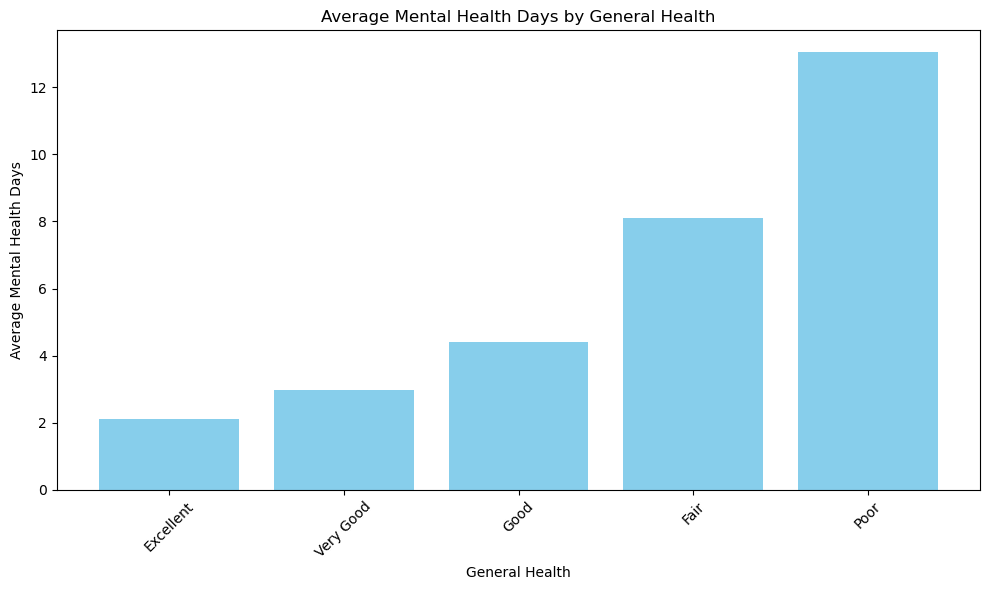

In [129]:
#Plot the Data:
plt.figure(figsize=(10, 6))
plt.bar(avg_mental_health_days['GeneralHealth'], avg_mental_health_days['AverageMentalHealthDays'], color='skyblue')
plt.title('Average Mental Health Days by General Health')
plt.xlabel('General Health')
plt.ylabel('Average Mental Health Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output_data/avg_days_by_health.png")
plt.show()

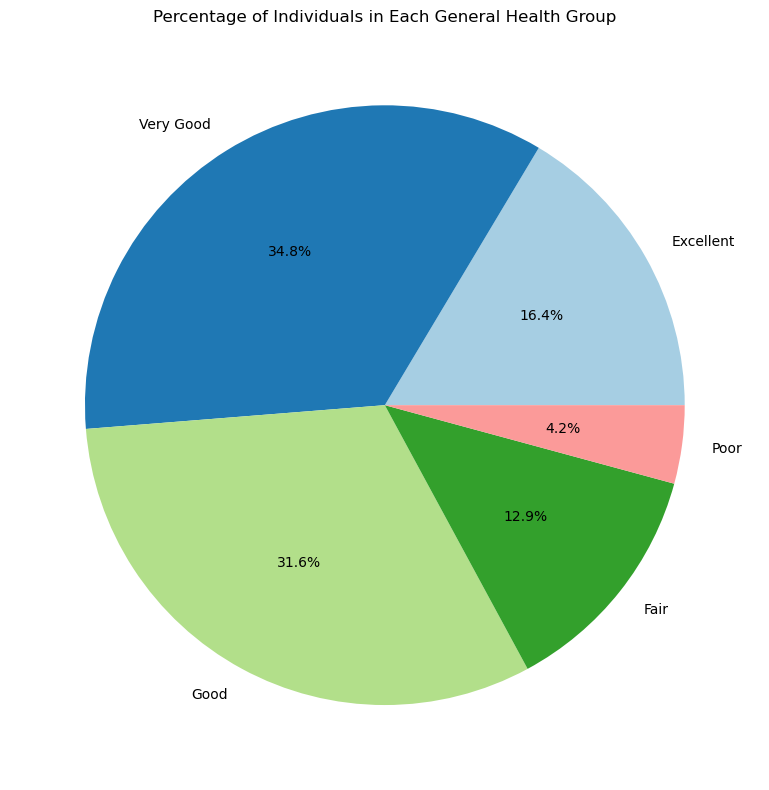

In [131]:
# pie chart of people in each bucket 
# Extract data for the pie chart
labels = avg_mental_health_days['GeneralHealth']
sizes = avg_mental_health_days['Count']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentages
    startangle=0,     # Rotate the chart for better visualization
    colors=plt.cm.Paired.colors  # Use a color map for variety
)

# Add a title
plt.title('Percentage of Individuals in Each General Health Group')

# Show the plot
plt.tight_layout()
plt.savefig("output_data/percent_ind_by_health_group.png")
plt.show()

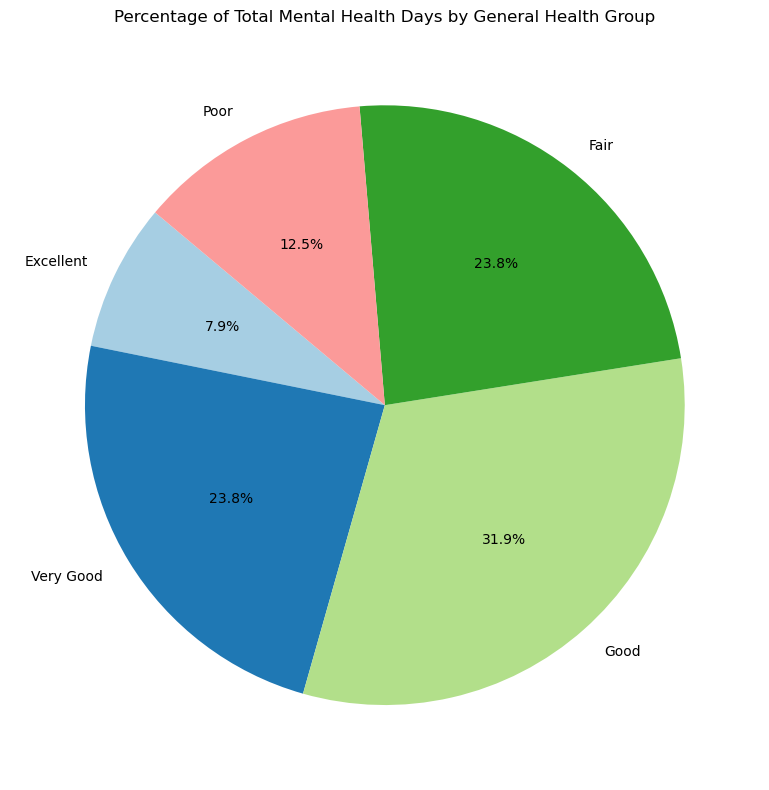

In [132]:
# Weighted pie chart
# Calculate total mental health days for each group
avg_mental_health_days['TotalMentalHealthDays'] = (
    avg_mental_health_days['Count'] * avg_mental_health_days['AverageMentalHealthDays']
)

# Extract data for the pie chart
labels = avg_mental_health_days['GeneralHealth']
sizes = avg_mental_health_days['TotalMentalHealthDays']  # Use total mental health days for weighting

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentages
    startangle=140,     # Rotate the chart for better visualization
    colors=plt.cm.Paired.colors  # Use a color map for variety
)

# Add a title
plt.title('Percentage of Total Mental Health Days by General Health Group')

# Print and Show the plot
plt.tight_layout()
plt.savefig("output_data/percent_total_mhdays_by_health_group.png")
plt.show()

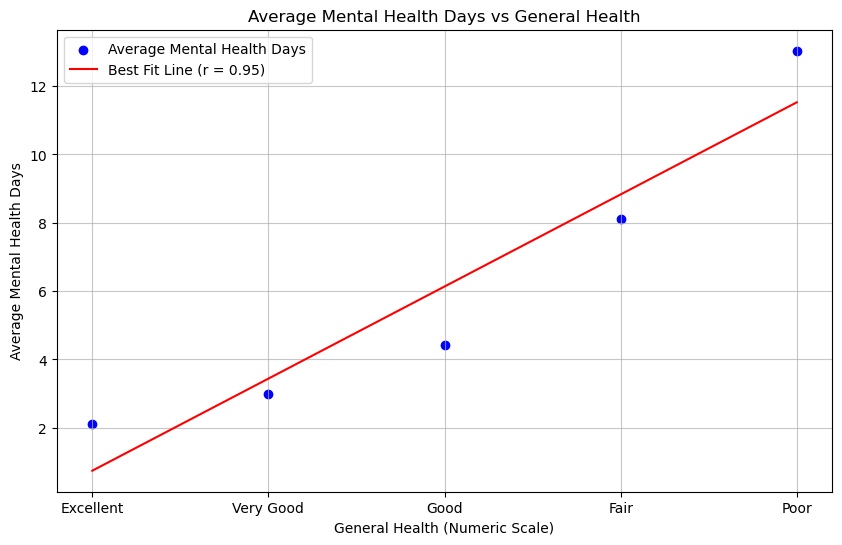

In [133]:
# Do a scatter plot and best fit line for the averages
# Extract the x and y values
x = avg_mental_health_days['HealthOrder']
y = avg_mental_health_days['AverageMentalHealthDays']

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept  

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Average Mental Health Days')
plt.plot(x, line, color='red', label=f'Best Fit Line (r = {r_value:.2f})')

# Customize the plot
plt.title('Average Mental Health Days vs General Health')
plt.xlabel('General Health (Numeric Scale)')
plt.ylabel('Average Mental Health Days')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.legend()
plt.grid(alpha=0.7)


# Print and show the plot
plt.savefig("output_data/avg_mhdays_by_health_group_analysis.png")

plt.show()

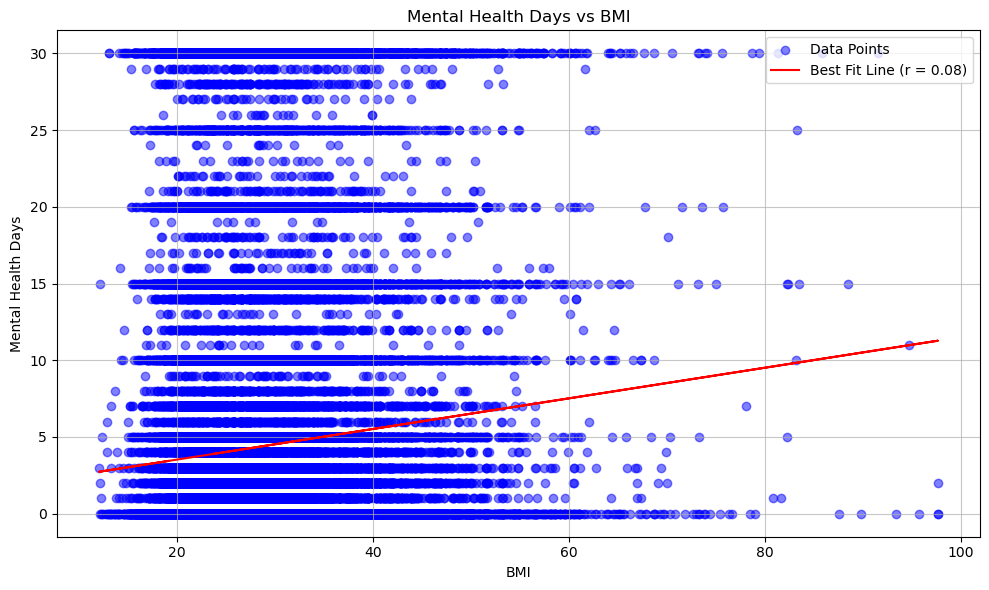

In [134]:
# compare mental health days to BMI

# Extract x (BMI) and y (MentalHealthDays) values
x = cleaned_data3_df['BMI']
y = cleaned_data3_df['MentalHealthDays']

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept  # Equation of the line

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue', label='Data Points')
plt.plot(x, line, color='red', label=f'Best Fit Line (r = {r_value:.2f})')

# Customize the plot
plt.title('Mental Health Days vs BMI')
plt.xlabel('BMI')
plt.ylabel('Mental Health Days')
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()

# Print and Show the plot
plt.savefig("output_data/mhdays_by_BMI.png")
plt.show()
